# Tariff Schemes

# An introduction to optimization

The text was written by the course instructor.
The programming code is written by the author.

Generally, the basic elements of an optimization are: decision variables, objective, constraints, and input parameters. 

$$max/min \quad c^Tx$$

$$st. \quad Ax\leq b$$

$$and \quad 0\leq x$$

- Decision variables (x): a vector (one-dimensional array) of the decision variables whose values we can change to find an optimal solution.
- Objective ($c^Tx$): the Objective is a function of the decision variables. It gives a single number evaluating a solution, which the Optimizer tries to minimize or maximize, whichever you specify in the formulation. 
- Constraints ($0\leq x$): The constraints are bounds on functions of the decision variables. Constraints can be written in the form of equality constraints and  inequality constraints.

- Input parameters ($A, b$): data that is given as the input.

Depending on the objective and the constraints, the type of optimization problem can be different:
1. linear programs (LP,), the objective and all the constraints are linear function of the decision variables.
2. quadratic programs (QP), the objective and constraints must all be linear or quadratic functions of decision variables.
3. nonlinear programs (NLP), any of the constraints or objectve include function of the decision variables. 

In addition, regarding the type of decision variable, we can end up with continuous, discrete, or mixed optimization problem.


# Solve an optimization problem

In order to implement an optimization problem and solve it, we need three different components:
1. programing language, such as Python, Algebraic modeling language (AML)
2. modeling system for mathematical optimization, like CVXPY, Pyomo, GAMS 
3. an optimization solver, such as glpk (free solver), Gurobi (commercial solver)
It should be also noted that not all the solvers are able to solve all type of problems. For instance, CBC solver is only able to solve linear and mixed-integer linear problem. 

For more details about the fetaures of different solvers please check "Choosing a solver" part in: https://www.cvxpy.org/tutorial/advanced/index.html

# Schedule an electrical boiler

During this session, we will program our optimization problem using CVXPY package in python. GLPK_MI will be used as the solver as well.

As a start point, it is ecommended to check the available examples of CVXPY on: https://www.cvxpy.org/examples/basic/least_squares.html

In [ ]:
#import packages
import cvxpy as cp #a Python modeling language for convex optimization problems
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The first think we need to do is to import the input parameters, which in this case will be the load and the electricity price.

In [75]:
#import load profile and signal for dynamic pricing
load = pd.read_csv('load.csv').values # in W
print("size of load", np.shape(load))
price = pd.read_csv('price.csv').values #in EUR/Wh
print("size of price", np.shape(price))

size of load (24, 1)
size of price (24, 1)


As it can be seen, the frequency of load and the price of electricity is hourly. 

In [ ]:
dt = 1        #Time step [1 hr]
T = 24        #number of hour in one day

# 0: Without Demand Response

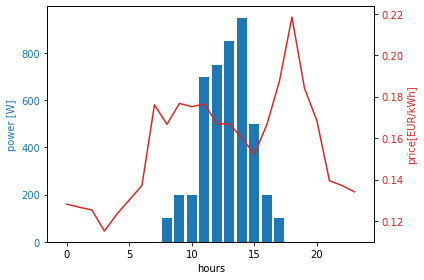

In [ ]:
#plot results without Demand Response
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('hours')
ax1.set_ylabel('power [W]', color=color)
ax1.bar(np.arange(T), load[:, 0]*dt, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('price[EUR/kWh]', color=color)  # we already handled the x-label with ax1
ax2.plot(np.arange(T), price*1e3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
#calculate total cost

cost_without_DR = sum(load*dt*price)

print("Total cost without DR = ", cost_without_DR)


Total cost without DR =  [0.7578928]


# 1: Demand Response1:  

Solve the cost optimization problem of a hot water boiler responding to a real-time pricing scheme. Here, it is assumed that the electric power consumption is limited to 1350 W. However, it can be any value between 0 and 1350 W, which means that we are facing with a continuous variable.

Below you can see the mathematical formulation for this problem.

\begin{align}
    &minimize
    \begin{aligned}[t]
       &\sum_{t=1}^{T} \bigl(p_1(t)*dt*price(t)\big) 
    \end{aligned} \notag \\
    &\text{subject to} \notag \\
    & \sum_{t=1}^{T} p_1(t)*dt = E_{tot}, \\
    & p_1(t)\geq0,\quad p_1(t)\leq{P_{max}}.\notag \\
    \\
    &\text{while the parameters are:} \notag \\
    & p_{max} = 1350 W,  \\
    & \sum_{t=1}^{T} load(t)*dt = E_{tot},
\end{align}

now, please start complete the code:

In [ ]:
#variable p_1
p_1 = cp.Variable(T)

In [ ]:
#select parameters
#Maximum power consumption
P_max_1 = 1350
#calculate the total consumption of boiler during one day
Etot = sum(load*dt)
print(Etot)


[4550]


In [ ]:
#Constraints: Power constraints and Energy constraint

constraints = [0 <= p_1, p_1 <= P_max_1, sum(p_1*dt) == Etot]

In [ ]:
#objective function

objective = cp.Minimize(sum(p_1*dt*price))

In [ ]:
#Solve optimization problem

prob = cp.Problem(objective, constraints)

In [ ]:
# print the optimal results by using solver GLPK_MI
print("Total cost DR1", prob.solve(solver=cp.GLPK_MI))
print("Optimal var")
print(p_1.value) # A numpy ndarray.
print(sum(p_1.value))

Total cost DR1 0.55444045
Optimal var
[   0.  500. 1350. 1350. 1350.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
4550.0


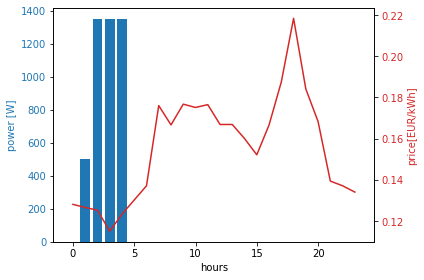

In [ ]:
#plot the results
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('hours')
ax1.set_ylabel('power [W]', color=color)
ax1.bar(np.arange(T), p_1.value, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('price[EUR/kWh]', color=color)  # we already handled the x-label with ax1
ax2.plot(np.arange(T), price*1e3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [ ]:

#Please compare the results from 0 and 1 in your answer sheet


# 2: Demand Response2:

Here, it is assumed that the electric power consumption is limited to 1350 W and it can be on or off. In this case, you are dealing with a mixed-inteager linear problem(MILP). This means, the boiler can work only in two modes, on and off. When the boiler is on it consumes 1350 W and when it is off it consumes no electricity.

Tip: since here we are facing a binary variable, on or off mode, instead of a continuous variable we need to define a "boolean" variable. For more information please check the tutorial of CVXPY for boolean variable in a MILP https://www.cvxpy.org/tutorial/advanced/index.html . 

In [ ]:
#select parameters
P_max_2 = 1350
Etot = sum(load*dt)
Etot


array([4550])

In [ ]:
#variabl  p_2
p_2 = P_max_2* cp.Variable(T, boolean=True)
#p_2 =  cp.Variable(T, boolean=True)


Here please pay attension to the constraints. the constraint to meet the total demand needs to be changed from equality form to inequality form. 

In [ ]:
#Constraints: Power constraints and Energy constraint

constraints = [sum(p_2*dt) >= Etot]


In [ ]:
#objective function
objective = cp.Minimize(sum(p_2*dt*price))

In [ ]:
#Solve optimization problem
prob = cp.Problem(objective, constraints)

In [ ]:
# print the optimal results
print("Total cost DR2", prob.solve(solver=cp.GLPK_MI))
print("Optimal var")
print(p_2.value) # A numpy ndarray.
print(Etot)
print(sum(p_2.value))

Total cost DR2 0.0
Optimal var
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[4550]
0.0


TypeError: ignored

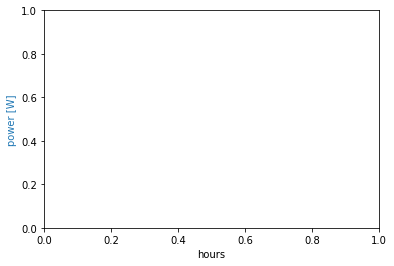

In [ ]:

#plot the results
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('hours')
ax1.set_ylabel('power [W]', color=color)
ax1.bar(np.arange(T), p_2.value, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('price[EUR/kWh]', color=color)  # we already handled the x-label with ax1
ax2.plot(np.arange(T), price*1e3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
#Please compare the results in your answer sheet


# 3: Demand Response3:

Now, it is assumed that the electric power consumption is limited to 600 W, instead of 1350 W. In this step, the dicision varivale is a continuous variable. 

In [ ]:
#please write down your code, here.
P_max_3 = 600
Etot = sum(load*dt)

NameError: ignored

In [ ]:
#variable p_3

p_3 = cp.Variable(T, boolean=True)

In [ ]:
#Constraints: Power constraints and Energy constraint

constraints = [sum(P_max_3*p_3*dt) >= Etot]

In [ ]:
#objective function

objective = cp.Minimize(sum(P_max_3*p_3*price))

In [ ]:
#Solve optimization problem


prob = cp.Problem(objective, constraints)

In [ ]:
# print the optimal results
print("Total cost DR3", prob.solve(solver=cp.GLPK_MI))
print("Optimal var")
print(P_max_3*p_3.value) # A numpy ndarray.

Total cost DR3 0.6120006
Optimal var
[600. 600. 600. 600. 600. 600. 600.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 600.]


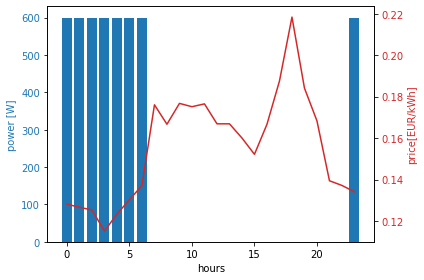

[4550]
4800.0


In [ ]:
#plot the results and also fill your answer sheet
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('hours')
ax1.set_ylabel('power [W]', color=color)
ax1.bar(np.arange(T), P_max_3*p_3.value, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('price[EUR/kWh]', color=color)  # we already handled the x-label with ax1
ax2.plot(np.arange(T), price*1e3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
print(Etot)
print(sum(P_max_3*p_3.value))

# 4: Demand Response4:

Repeat the 3rd step, but here please convert it to a MILP.

In [ ]:
P_max_4 = 600
Etot = sum(load*dt)



In [ ]:
#variable p_4

p_4 = cp.Variable(T)


In [ ]:
#Constraints: Power constraints and Energy constraint


constraints = [0 <= p_4, p_4 <= P_max_4, sum(p_4*dt) == Etot]

In [ ]:
#objective function


objective = cp.Minimize(sum(p_4*dt*price))


In [ ]:
#Solve optimization problem

prob = cp.Problem(objective, constraints)

In [ ]:
# print the optimal results
print("Total cost DR1", prob.solve(solver=cp.GLPK_MI))
print("Optimal var")
print(p_4.value) # A numpy ndarray.
print(sum(p_4.value))


Total cost DR1 0.57771885
Optimal var
[600. 600. 600. 600. 600. 600. 350.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0. 600.]
4550.0


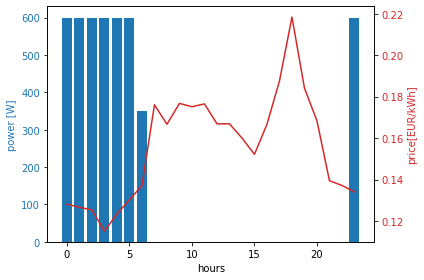

In [ ]:
#plot the results
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('hours')
ax1.set_ylabel('power [W]', color=color)
ax1.bar(np.arange(T), p_4.value, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('price[EUR/kWh]', color=color)  # we already handled the x-label with ax1
ax2.plot(np.arange(T), price*1e3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()